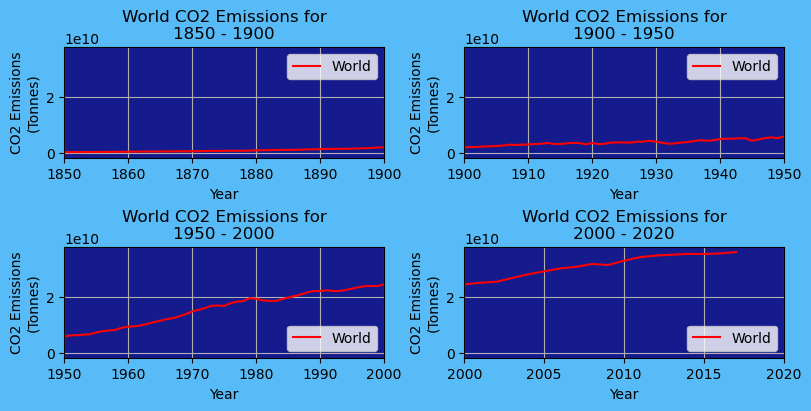

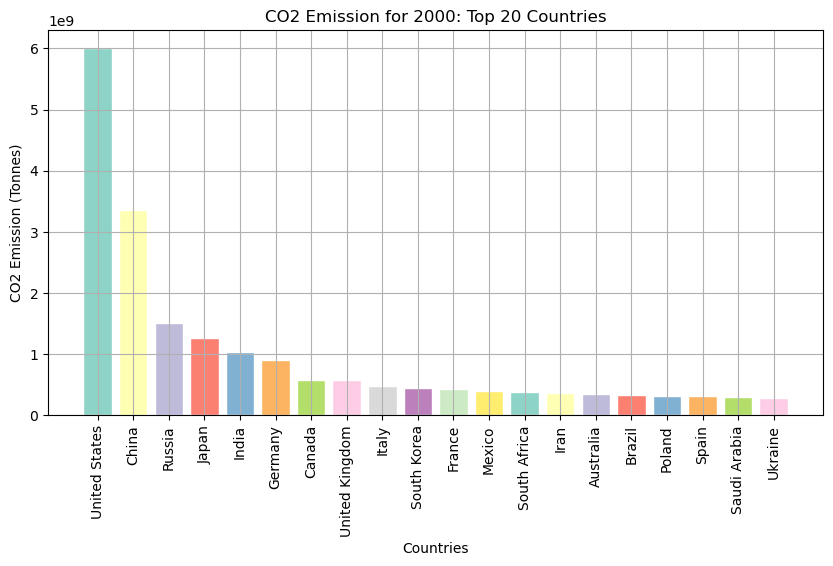

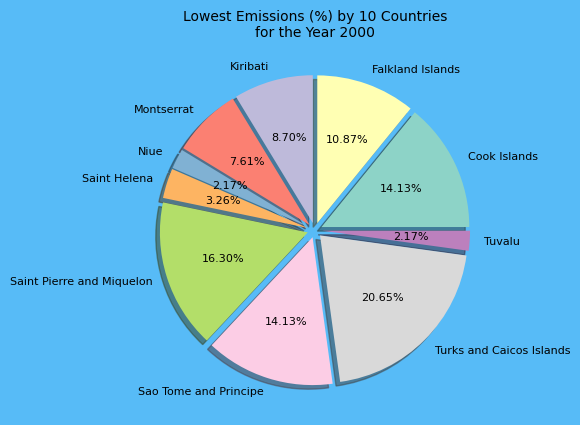

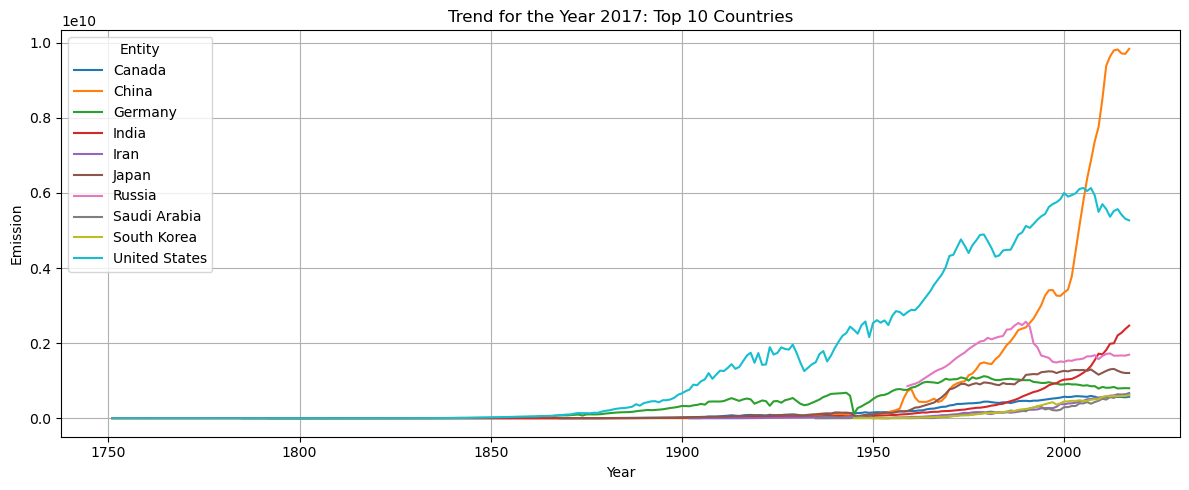

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#read file
df = pd.read_csv(r"co2_emission.csv")

#description of datafram
df.describe()

#plot 1: sub-plots of dataset for the whole world ranging in different periods
line_df = df[df.Entity=='World']

fig, axs = plt.subplots(2, 2, figsize = (8, 2 * 2), constrained_layout = True, facecolor='#57BBF7')

#sub-plot 1: 1850-1900
axs[0, 0].plot(line_df['Year'], line_df['Emission'], label='World', color='r')
axs[0, 0].set_xlim([1850, 1900])
axs[0, 0].set(xlabel='Year', ylabel='CO2 Emissions\n' + '(Tonnes)', title='World CO2 Emissions for\n' + '1850 - 1900')
axs[0, 0].legend(loc='upper right')
axs[0,0].grid(True)
axs[0, 0].set_facecolor('#151B8D')

#sub-plot 1: 1900-1950
axs[0, 1].plot(line_df['Year'], line_df['Emission'], label='World', color='r')
axs[0, 1].set_xlim([1900,1950])
axs[0, 1].set(xlabel='Year', ylabel='CO2 Emissions\n' + '(Tonnes)', title='World CO2 Emissions for\n' + '1900 - 1950')
axs[0, 1].legend(loc='upper right')
axs[0, 1].grid(True)
axs[0, 1].set_facecolor('#151B8D')

#sub-plot 1: 1950-2000
axs[1, 0].plot(line_df['Year'], line_df['Emission'], label='World', color='r')
axs[1, 0].set_xlim([1950,2000])
axs[1, 0].set(xlabel='Year', ylabel='CO2 Emissions\n' + '(Tonnes)', title='World CO2 Emissions for\n' + '1950 - 2000')
axs[1, 0].legend(loc='lower right')
axs[1, 0].grid(True)
axs[1, 0].set_facecolor('#151B8D')

#sub-plot 1: 2000-2020
axs[1, 1].plot(line_df['Year'], line_df['Emission'], label='World', color='r')
axs[1, 1].set_xlim([2000,2020])
axs[1, 1].set(xlabel='Year', ylabel='CO2 Emissions\n' + '(Tonnes)', title='World CO2 Emissions for\n' + '2000 - 2020')
axs[1, 1].legend(loc='lower right')
axs[1,1].grid(True)
axs[1, 1].set_facecolor('#151B8D')

plt.show()

#plot 2: bar plot of the top 20 countries for co2 emissions (Year 2000)

#sort values for the Year 2000
year00_df = df[df.Year == 2000]
year00_df = year00_df.sort_values(by='Emission', ascending=False)
year00_df.notna()

#remove the unwanted data
year00_df = year00_df[year00_df.Entity != 'World']
year00_df = year00_df[~pd.isna(year00_df.Code)]
year00_df.head(20)

#plotting
plt.figure(figsize=(10,5))
plt.bar(year00_df.Entity.head(20), year00_df.Emission.head(20), color=sns.color_palette('Set3'), edgecolor='white')
plt.xlabel('Countries', fontsize=10)
plt.ylabel('CO2 Emission (Tonnes)')
plt.title('CO2 Emission for 2000: Top 20 Countries', fontdict={'fontsize':12})
plt.grid(True)
plt.xticks(rotation=90)

plt.show()

#plot 3: pie chart representing percentages for the countries with least co2 emission (Year 2000)

#calculate sum of the data for the Year 2000
year00_sum = year00_df['Emission'].sum()
np.round(year00_sum/1e6,2)

#calculate percentage from the sum
year00_df['Emission %'] = (year00_df['Emission']/year00_sum) * 100

#plotting
from matplotlib.pyplot import pie, axis, show

sums = year00_df.groupby(year00_df["Entity"].tail(10))["Emission %"].sum()

fig = plt.figure()
fig.patch.set_facecolor('#57BBF7')
axis('equal');
pie(sums, labels=sums.index, autopct='%1.2f%%',
    textprops={'fontsize':8},
    colors=sns.color_palette('Set3'),
    shadow=True, 
    explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
plt.title("Lowest Emissions (%) by 10 Countries\n" + "for the Year 2000", fontsize=10)

show()

#plot 4: line plot for the top 10 countries (Year 2017)

#sort the values of data for the Year 2017
year2017_df = df[df.Year == 2017]
year2017_df = year2017_df.sort_values(by='Emission', ascending=False)
year2017_df.notna()

#remove unwanted data
year2017_df = year2017_df[year2017_df.Entity != 'World']
year2017_df = year2017_df[~pd.isna(year2017_df.Code)]
top_2017 = year2017_df.head(10)
top_2017

#filter top 10 countries
top_n = list(top_2017.Entity[0:10])
top_10 = df[(df.Entity.isin(top_n))]
top_10

#plotting
fig = plt.figure(figsize=(12,5))

sns.lineplot(x='Year', y='Emission', hue='Entity', data=top_10)

plt.title('Trend for the Year 2017: Top 10 Countries')
plt.grid()

plt.tight_layout()

plt.show()